In [1]:
#import modules
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#change directory
os.chdir('C:\\Users\\miran\\Documents\\INST 326\\Project')

#load data
air_bnb=pd.read_csv('AB_NYC_2019.csv')
#check to see if data loaded
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#find average price for rooms groupby neighborhood
air_bnb.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [4]:
#descriptive stats
air_bnb[['neighbourhood_group','price','room_type','minimum_nights','availability_365']].agg(['describe'])

,neighbourhood_group,price,room_type,minimum_nights,availability_365
,describe,describe,describe,describe,describe
count,48895,48895.000000,48895,48895.000000,48895.000000
unique,5,NaN,3,NaN,NaN
top,Manhattan,NaN,Entire home/apt,NaN,NaN
freq,21661,NaN,25409,NaN,NaN
mean,NaN,152.720687,NaN,7.029962,112.781327
std,NaN,240.154170,NaN,20.510550,131.622289
min,NaN,0.000000,NaN,1.000000,0.000000
25%,NaN,69.000000,NaN,1.000000,0.000000
50%,NaN,106.000000,NaN,3.000000,45.000000


Text(0.5, 0.98, 'Price Based on Minimum Nights')

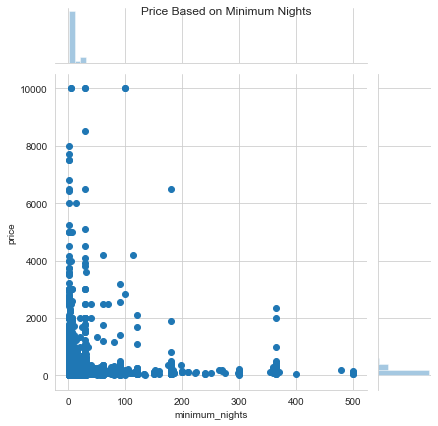

In [9]:
#Create a scatter plot that shows the relationship between price (Y) and minimum nights stay(X).
#use sns seaborn library
air_bnb_changed=air_bnb[air_bnb['minimum_nights']<900]
g = sns.jointplot(x='minimum_nights', y='price', data=air_bnb_changed)
g.fig.suptitle("Price Based on Minimum Nights")


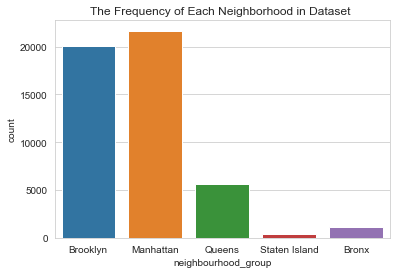

In [3]:
#barchart of neighbourhood this is looking at the frequency of each neighbourhood in the dataset
sns.set_style("whitegrid")

ax = sns.countplot(x='neighbourhood_group', data=air_bnb).set_title('The Frequency of Each Neighborhood in Dataset ')


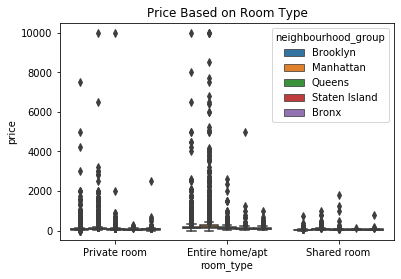

In [11]:
#boxplot with room_type and price,neighbourhood as hue. This plot tells us how the prices vary by 
#room_type and by neighbourhood
g = sns.boxplot(x='room_type',y='price', hue='neighbourhood_group', data=air_bnb).set_title("Price Based on Room Type")


In [5]:
#subset Brooklyn data to 500 values
air_bnb1=air_bnb[air_bnb['neighbourhood_group']=='Brooklyn']
air_bnb_Brooklyn=air_bnb1.head(500)


In [6]:
#subset Manhattan data to 500 values
air_bnb2=air_bnb[air_bnb['neighbourhood_group']=='Manhattan']
air_bnb_Manhattan=air_bnb2.head(500)

In [7]:
#join together Brooklyn and Manhattan
data=[air_bnb_Brooklyn,air_bnb_Manhattan]
finaldata=pd.concat(data)
finaldata.head()
finaldata['neighbourhood_group'].value_counts()

Brooklyn     500
Manhattan    500
Name: neighbourhood_group, dtype: int64

Text(0.5, 1.0, 'Linear Regression Plot for the Price Based on Minimum Nights')

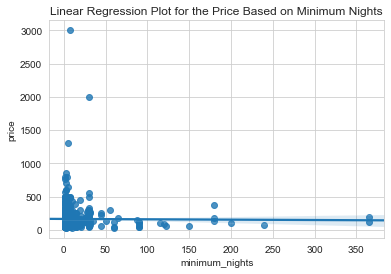

In [8]:
#If we are interested in linear regression plot for 2 numeric variables we can use regplot
sns.regplot(x='minimum_nights', y='price', data=finaldata).set_title('Linear Regression Plot for the Price Based on Minimum Nights')

In [21]:
#run linear regression model (this is research question)
import statsmodels.formula.api as smf
# create a fitted model
lm = smf.ols(formula='price ~minimum_nights', data=finaldata).fit()
#summary stats
lm.summary()

#t-test for neighborhood and price

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08032
Date:                Thu, 21 Nov 2019   Prob (F-statistic):              0.777
Time:                        09:39:01   Log-Likelihood:                -6442.4
No. Observations:                1000   AIC:                         1.289e+04
Df Residuals:                     998   BIC:                         1.290e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        164.8151      5.135     32.094      0.000     154.738     174.893
minimum_nights    -0.0547      0.193     -0.283      0.777      -0.433       0.324
==============================================================================
Omnibus:                     1573.099   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           891235.502
Skew:                           9.342   Prob(JB):                         0.00
Kurtosis:                     148.054   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#run second linear regression model
from sklearn import linear_model as lm
x=finaldata[['minimum_nights']]
y=finaldata[['price']]
model=lm.LinearRegression()
results=model.fit(x,y)
print(model.intercept_,model.coef_)


[164.81512643] [[-0.05468765]]


In [11]:
#first from scipy t-test for neighbourhood_group and price
from scipy import stats
df1=finaldata[finaldata['neighbourhood_group']=='Manhattan']['price']
df1_count=len(df1)
df2 = finaldata[ finaldata['neighbourhood_group'] == 'Brooklyn']['price']
df2_count=len(df2)
stats.ttest_ind(df1, df2)  

Ttest_indResult(statistic=3.694373535643038, pvalue=0.0002323991357911005)

In [12]:
#second t-test
import numpy as np
df1_mean=np.mean(df1)
df2_mean=np.mean(df2)
stddev_df1=np.std(df1, ddof=1)
stddev_df2=np.std(df2, ddof=1)
std_error=np.sqrt((stddev_df1**2/df1_count)+(stddev_df2**2/df2_count))
t_stat=(df1_mean-df2_mean)/std_error
print(t_stat)

3.6943735356430403
